<a href="https://colab.research.google.com/github/SundharessB/advanced-machine-learning/blob/main/Lab_Program1_2348564.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv("/content/Program_1_Dataset.csv")

In [5]:
df

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
502,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8
503,6.28807,0.0,18.10,0,0.740,6.341,96.4,2.0720,24,666,20.2,318.01,17.79,14.9
504,9.92485,0.0,18.10,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6


In [6]:
X = df[['Avg_rooms ']]  # Predictor


In [7]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

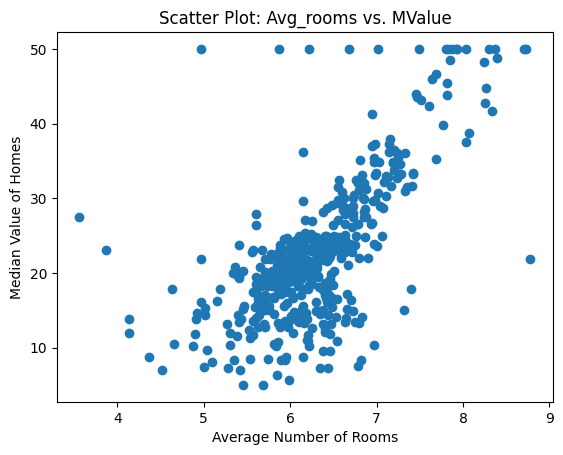

In [8]:
plt.scatter(df['Avg_rooms '], df['MValue'])
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of Homes')
plt.title('Scatter Plot: Avg_rooms vs. MValue')
plt.show()


In [9]:
X = df[['Avg_rooms ']]  # Predictor
y = df['MValue']       # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
coef = model.coef_[0]
intercept = model.intercept_
print(f'Coefficient: {coef:.2f}')
print(f'Intercept: {intercept:.2f}')

Coefficient: 8.93
Intercept: -33.51


In [12]:
# Training set
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Testing set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display the results
print(f'Training Mean Squared Error: {mse_train:.2f}')
print(f'Testing Mean Squared Error: {mse_test:.2f}')
print(f'Training R-squared: {r2_train:.2f}')
print(f'Testing R-squared: {r2_test:.2f}')


Training Mean Squared Error: 47.81
Testing Mean Squared Error: 33.85
Training R-squared: 0.46
Testing R-squared: 0.54


In [13]:
df['Predicted_MValue'] = model.predict(df[['Avg_rooms ']])

In [14]:
# Assuming df is your DataFrame
SSR = sum((df['MValue'] - df['Predicted_MValue'])**2)
SST = sum((df['MValue'] - df['MValue'].mean())**2)

RSQ = SSR / SST
print('R-squared:', RSQ)


R-squared: 0.5166909221707174


In [15]:
# Assuming df is your DataFrame and 'Predicted_MValue' is the column with predicted values
df['Error'] = df['MValue'] - df['Predicted_MValue']
mse = sum(df['Error']**2) / len(df)

print('Mean Squared Error:', mse)


Mean Squared Error: 43.618818319571844


In [16]:
# Assuming df is your DataFrame
x = df['Avg_rooms ']
y = df['MValue']

xy = x * y
n = len(df)

xmean = x.mean()
ymean = y.mean()

numerator = (xy.sum() - n * xmean * ymean)
denom = (x**2).sum() - n * (xmean**2)

m = numerator / denom
c = ymean - (m * xmean)

print('Intercept (c):', c, 'Coefficient (m):', m)


Intercept (c): -34.67062077643849 Coefficient (m): 9.102108981180297
